<a href="https://colab.research.google.com/github/Arshad221b/Sign-Language-Recognition-/blob/master/ASL2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path ='/content/drive/MyDrive/SignLangDetectn/'

In [ ]:
import keras
import numpy as np
import pandas as pd
import cv2 
from keras.models import Sequential 
from keras.layers import Conv2D,MaxPooling2D, Dense,Flatten
from keras.datasets import mnist 
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.optimizers import SGD

In [ ]:
!pip install PyDrive

In [ ]:
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
#download = drive.CreateFile({'id': '1wG0gS-bqjV6yz1YveuxkvHT5_2DOuT05'})
#download.GetContentFile(path+'train.csv')
train = pd.read_csv(path+'train.csv')

In [ ]:
#download = drive.CreateFile({'id': '1q_Zwlu3RncjKq1YpiVtkiMPxIIueGRYB'})
#download.GetContentFile('test.csv')
test = pd.read_csv(path+'test.csv')

In [ ]:
test_csv= pd.read_csv(path+'test.csv')
test.head

In [ ]:
display(train.info())

display(test.info())

display(train.head(n = 2))
display(test.head(n = 2))

In [ ]:
train_Y = train['label']
test_Y = test['label']
train_X = train.drop(['label'],axis = 1)
test_X = test.drop(['label'],axis = 1)

In [ ]:
train_X = train_X.astype('float32') / 255
test_X = test_X.astype('float32')/255

In [ ]:
display(train_Y)


In [ ]:

train_X = train_X.values.reshape(27455,784)
test_X = test_X.values.reshape(7172,784)
train_Y = keras.utils.to_categorical(train_Y,26)
test_Y = keras.utils.to_categorical(test_Y,26)

In [ ]:
model = Sequential()
model.add(Dense(units=128,activation="relu",input_shape=(784,)))
model.add(Dense(units=128,activation="relu"))
model.add(Dense(units=128,activation="relu"))
model.add(Dense(units=128,activation="relu"))
model.add(Dense(units=128,activation="relu"))
model.add(Dense(units=26,activation="softmax"))

In [ ]:
model.compile(optimizer=SGD(0.001),loss="categorical_crossentropy",metrics=["accuracy"])
model.fit(train_X,train_Y,batch_size=32,epochs=100,verbose=1)

In [ ]:
accuracy = model.evaluate(x=test_X,y=test_Y,batch_size=32)
print("Accuracy: ",accuracy[1])

225/225 [==============================] - 1s 2ms/step - loss: 2.2555 - accuracy: 0.6596
Accuracy:  0.6596486568450928


In [ ]:
img = test_X[502]
test_img = img.reshape((1,784))
#img_class = model.predict_classes(test_img)
predict_x=model.predict(test_img) 
img_class=np.argmax(predict_x,axis=1)

prediction = img_class[0]
classname = img_class[0]
print("Class: ",classname)


1/1 [==============================] - 0s 113ms/step
Class:  22


In [ ]:
signlabels='ABCDEFGHIJKLMNOPQRSTUVWXYZ'
print('Sign Gesture represent the {} Alphabet'.format(signlabels[classname]))

Sign Gesture represent the W Alphabet


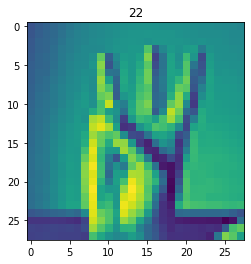

In [ ]:
img = img.reshape((28,28))
plt.imshow(img)
plt.title(classname)
plt.show()

In [ ]:
model.save_weights('model_weights.h5')
weights_file = drive.CreateFile({'title' : 'model_weights.h5'})
weights_file.SetContentFile('model_weights.h5')
weights_file.Upload()
drive.CreateFile({'id': weights_file.get('id')})

GoogleDriveFile({'id': '1B7dGDNHIOcVNDl42AU43oqueBW6SP3Pg'})

In [ ]:
model.save(path+'model.h5')
weights_file = drive.CreateFile({'title' : 'model.h5'})
weights_file.SetContentFile(path+'model.h5')
weights_file.Upload()
drive.CreateFile({'id': weights_file.get('id')})

GoogleDriveFile({'id': '1jQ7uY8zFw-JvClMBiB05Lg1qzD5lL8W9'})

In [ ]:
!pip install h5py pyyaml 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


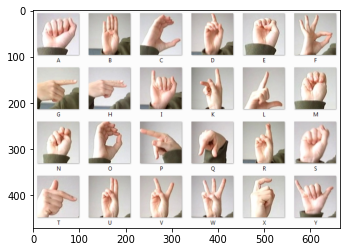

In [ ]:
from PIL import Image
img = np.asarray(Image.open(path+'amer_sign2.png'))
plt.imshow(img)

In [ ]:
!pip install streamlit

In [ ]:
!./ngrok authtokens 2Nc2niJ4ngxanHsdhtkJEwcmYeR_2F5RGFAtyneDDbczSFpVG

/bin/bash: ./ngrok: No such file or directory


In [ ]:
!pip install pyngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 761.3/761.3 KB 9.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyngrok: filename=pyngrok-5.2.1-py3-none-any.whl size=19790 sha256=601b786bc780a0104ae1e4124623cc5be0d2427280801d1c1b592ec2908a6dfc
  Stored in directory: /root/.cache/pip/wheels/f6/89/59/49d4249e00957e94813ac136a335d10ed2e09a856c5096f95c
Successfully built pyngrok


In [ ]:
%%writefile /content/drive/MyDrive/SignLangDetectn/app.py
import streamlit as st
import pickle
import numpy as np
import random as ran
import pandas as pd
import keras
from PIL import Image
import time

path ='/content/drive/MyDrive/SignLangDetectn/'
test = pd.read_csv(path+'test.csv')
test_X = test.drop(['label'],axis = 1)
test_X = test_X.astype('float32')/255
test_X = test_X.values.reshape(7172,784)

test_Y = test['label']
test_Y = keras.utils.to_categorical(test_Y,26)

model = keras.models.load_model('/content/drive/MyDrive/SignLangDetectn/model.h5')
r=1

def run():
    r= ran.randint(0,50)
    rimg = test_X[r]
    showimage = rimg.reshape((28,28))
    showimage = np.asarray(showimage)
    st.subheader('Here the testing image : ')
    st.image(showimage)     
    test_img = rimg.reshape((1,784))
    predict_x=model.predict(test_img) 
    img_class=np.argmax(predict_x,axis=1)
    classname = img_class[0]
    return classname
      
        
def show_predict_page():
    st.title("Sign Language Detection Model")

    st.write("""## Jabalpur Engineering College, Jabalpur​""")
    st.write("""### Computer Science Engineering """)
    st.write("""### 6th Semester""")
    st.write("""### Team- G6""")
    st.markdown("Team Members : :green[Pureshwar Gonekar] | :green[Ishani Malviya] | :green[Granendra Pratap Sign] | :green[Gaurav Kumar]")
    st.markdown("Project Guide : **:blue[Prof. M Gokhale]** ")

    imageshowbutton = st.button("Generate the Random Image")
    if imageshowbutton:
        classname=run()
        # if st.button("Predict the output"):
        st.write('Generating Result....')
        signlabels='ABCDEFGHIJKLMNOPQRSTUVWXYZ'
        st.write('Sign Gesture represent the {} Alphabet'.format(signlabels[classname]))
        accuracy = model.evaluate(x=test_X,y=test_Y,batch_size=32)
        st.subheader(f"Accuracy : {accuracy[1]*100}%")

def show_explore_page():
    st.title("Sign Language Detection Model")
    st.write("### Here is the American Sign Language Alphabers (except J and Z)!!")
    docimg = np.asarray(Image.open(path+'amer_sign2.png'))
    st.image(docimg)

page = st.sidebar.selectbox("Explore Or Predict", ("Predict", "Explore"))

if page == "Predict":
    show_predict_page()
else:
    show_explore_page()



Overwriting /content/drive/MyDrive/SignLangDetectn/app.py


In [ ]:
!streamlit run /content/drive/MyDrive/SignLangDetectn/app.py & npx localtunnel --port 8501